# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!
  
#### Import all the necessary libraries here:


In [1]:
# Libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Challenge 1

Download the `employees` dataset from [here](https://drive.google.com/file/d/1qiyQHmmntBsGHjlLSoSh9-t_R4UXOg_H/view?usp=sharing) and place it in the data folder

Load and save your dataset in a variable called `employees`.

In [2]:
# your code here
employees=pd.read_csv('../data/Employee.csv')
employees.head()

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55


In [3]:
new=employees.drop("Years", axis=1)
new.head()

,Name,Department,Education,Gender,Title,Salary
0,Jose,IT,Bachelor,M,analyst,35
1,Maria,IT,Master,F,analyst,30
2,David,HR,Master,M,analyst,30
3,Sonia,HR,Bachelor,F,analyst,35
4,Samuel,Sales,Master,M,associate,55


#### What's the mean `Salary` by `Department`?
**Tip**: There are 2 ways to do it: with or without pivot tables. Do it both ways. 

In [4]:
# Method 1
# your code here
new.pivot_table(new, columns=["Department"], aggfunc='mean')

Department,HR,IT,Sales
Salary,45.0,48.75,55.0


In [5]:
# Method 2
# your code here
new.groupby(["Department"]).mean()

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### Now, group the data by more than one column. Use Pandas pivot table function to select the mean `Salary` by `Department` and `Title`.

In [6]:
# your code here
new.pivot_table(new, columns=["Department","Title"], aggfunc='mean')

Department    HR            IT                       Sales
Title         VP analyst    VP analyst associate associate
Salary      70.0    32.5  70.0    32.5      60.0      55.0

#### Display the number of `Years` of work experience and the `Salary` for each `Title`. Add `Years` as a column in your pivot table.
**Hint**: Use Pandas documentation to explore the [pivot table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) function.

In [7]:
# your code 
employees.pivot_table(employees, columns=["Title","Years"], aggfunc='mean')

Title   VP analyst         associate        
Years    8       1   2   4         2   3   7
Salary  70      35  30  35        55  55  60

#### Find the mean `Salary` and number of employees in each `Department` and for each job `Title`.

In [8]:
# your code here
new.pivot_table(new, columns=["Title","Department"], aggfunc='mean')

Title         VP       analyst       associate      
Department    HR    IT      HR    IT        IT Sales
Salary      70.0  70.0    32.5  32.5      60.0  55.0

#### For each `Department` and each job `Title`, find the `Salary` median, minimum, maximum and standard deviation. Comment your results.

In [9]:
new.groupby(by=["Title","Department"]).median()

Salary
Title     Department        
VP        HR            70.0
          IT            70.0
analyst   HR            32.5
          IT            32.5
associate IT            60.0
          Sales         55.0

In [10]:
new.groupby(by=["Title","Department"]).min()

Name Education Gender  Salary
Title     Department                                 
VP        HR             Ana    Master      F      70
          IT          Carlos    Master      M      70
analyst   HR           David  Bachelor      F      30
          IT            Jose  Bachelor      F      30
associate IT           Pedro       Phd      M      60
          Sales          Eva  Bachelor      F      55

In [11]:
new.groupby(by=["Title","Department"]).max()

Name Education Gender  Salary
Title     Department                                 
VP        HR             Ana    Master      F      70
          IT          Carlos    Master      M      70
analyst   HR           Sonia    Master      M      35
          IT           Maria    Master      M      35
associate IT           Pedro       Phd      M      60
          Sales       Samuel    Master      M      55

In [12]:
#employees.pivot_table(employees, columns=["Title","Department"], aggfunc='min')
new.groupby(by=["Title","Department"]).std()

Salary
Title     Department          
VP        HR               NaN
          IT               NaN
analyst   HR          3.535534
          IT          3.535534
associate IT               NaN
          Sales       0.000000

In [13]:
"""
Because the sample of data is so small, the median, max and min values are almost the same, and the standard deviation cannot be calculated in some cases because there is only 1 data point
"""

'\nBecause the sample of data is so small, the median, max and min values are almost the same, and the standard deviation cannot be calculated in some cases because there is only 1 data point\n'

#### Based on your comments, fill the missing values with an appropriate value.

In [14]:
# your code here
deviation=new.groupby(by=["Title","Department"]).std()
deviation.fillna(0, inplace=True)
deviation

Salary
Title     Department          
VP        HR          0.000000
          IT          0.000000
analyst   HR          3.535534
          IT          3.535534
associate IT          0.000000
          Sales       0.000000

#### The stake holders want to know, for each `Department`, the number of employees and how much money is spent on salaries. Could you provide that information? 

In [15]:
# your code here
new.pivot_table(new, columns=["Department"], aggfunc='sum')

Department,HR,IT,Sales
Salary,135,195,110


In [16]:
new.groupby('Department').agg({'Salary':sum, 'Name':'count'})

,Salary,Name
Department,,
HR,135,3
IT,195,4
Sales,110,2


#### For each `Department` and `Title`, find the the total years of work experience and the mean `Salary`.

In [17]:
# your code here
employees.groupby(['Department','Title']).agg({'Years':sum, 'Salary':'mean'})

Years  Salary
Department Title                   
HR         VP             8    70.0
           analyst        6    32.5
IT         VP             8    70.0
           analyst        3    32.5
           associate      7    60.0
Sales      associate      5    55.0

## Bonus Challenge 1

#### Compute the mean `Salary` after removing the maximum `Salary` for each `Department`. Create the appropriate pivot table.
**Hint**: Write a custom function.

In [18]:
# your code here

# Challenge 2

Read the `fitbit` dataset from
[here](https://drive.google.com/file/d/1V3A0sRLmAb6BDFoZBIrjUOMl5Ap9wSts/view?usp=sharing) and place it in the data folder


Save your data in a variable called `fitbit`.

In [19]:
# your code here
fitbit=pd.read_csv('../data/Fitbit.csv')
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491


#### Explore you dataset in terms of data types and descriptive statistics.
**Hint**: Use Pandas functions from previous lectures.

In [20]:
# your code here
fitbit.dtypes

Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object

In [21]:
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


#### You suspect that there must be a linear relationship between the `Minutes Very Active` and the `Steps`. Compute the correlation between these variables.

In [22]:
# your code here
fitbit['Minutes Very Active'].corr(fitbit['Steps'])

0.5714518481062608

#### Use matplotlib to visually plot `Minutes Very active` vs `Steps`. We'll work with matplotlib next week. As a first introduction, uncomment and complete the following code. You need to replace the # symbol for the correct function arguments. 

In [23]:
import matplotlib.pyplot as plt;

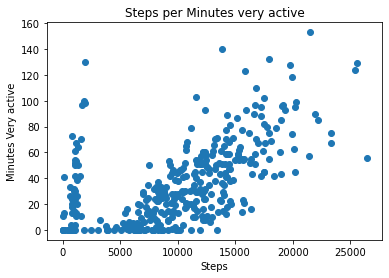

In [24]:
x=fitbit["Steps"]
y=fitbit["Minutes Very Active"]

plt.scatter(x,y)
plt.title("Steps per Minutes very active")
plt.xlabel("Steps")
plt.ylabel("Minutes Very active")
plt.show()


#### What can you say about `Minutes Very Active` and `Steps`? Write a comment below.

In [25]:
"""
There seems to be a positive correlation between steps and minutes very active, where the larger the number of steps the higher the number of minutes very active. 
"""

'\nThere seems to be a positive correlation between steps and minutes very active, where the larger the number of steps the higher the number of minutes very active. \n'

#### We also suspect that there must be a linear relationship between the `Minutes Sedentary` and the `Steps`. Compute the correlation between these variables.

In [26]:
# your code here
fitbit['Minutes Sedentary'].corr(fitbit['Steps'])

0.07690608062990094

#### Use matplotlib to visually plot `Minutes Sedentary` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

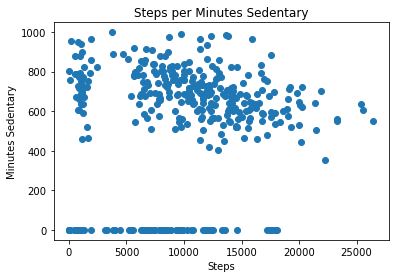

In [27]:
# your code here
x=fitbit["Steps"]
y=fitbit["Minutes Sedentary"]

plt.scatter(x,y)
plt.title("Steps per Minutes Sedentary")
plt.xlabel("Steps")
plt.ylabel("Minutes Sedentary")
plt.show()

In [28]:
"""
From the visualization there seems to be a negative correlation between steps and minutes sedentary, where the larger the number of steps the lower the number of minutes sedentary. And viceversa, the lower the number of steps, the larger the number of minutes sedentary.
"""

'\nFrom the visualization there seems to be a negative correlation between steps and minutes sedentary, where the larger the number of steps the lower the number of minutes sedentary. And viceversa, the lower the number of steps, the larger the number of minutes sedentary.\n'

#### We also suspect that there must be a linear relationship between the `MinutesOfSleep` and the `Steps`. Compute the correlation between these variables.

In [29]:
# your code here
fitbit['MinutesOfSleep'].corr(fitbit['Steps'])

0.13098565950836386

#### Use matplotlib to visually plot `MinutesOfSleep` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

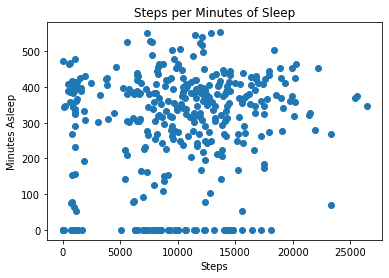

In [30]:
# your code here
x=fitbit["Steps"]
y=fitbit["MinutesOfSleep"]

plt.scatter(x,y)
plt.title("Steps per Minutes of Sleep")
plt.xlabel("Steps")
plt.ylabel("Minutes Asleep")
plt.show()

In [31]:
"""
In this case there is no clear correlation, which means there is no clear relationship between minutes of sleep and steps.
"""

'\nIn this case there is no clear correlation, which means there is no clear relationship between minutes of sleep and steps.\n'

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`.

In [32]:
columns = ['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']

In [33]:
# your code here
df = pd.DataFrame(fitbit,columns=columns)

corr_fit = df.corr()
print (corr_fit)

                     Calorie burned     Steps    Floors  Minutes Sedentary  \
Calorie burned             1.000000  0.255305  0.130757           0.125353   
Steps                      0.255305  1.000000  0.306511           0.076906   
Floors                     0.130757  0.306511  1.000000           0.057812   
Minutes Sedentary          0.125353  0.076906  0.057812           1.000000   
Minutes Very Active        0.197881  0.571452  0.399503           0.105963   
MinutesOfSleep             0.011485  0.130986  0.069464           0.204242   

                     Minutes Very Active  MinutesOfSleep  
Calorie burned                  0.197881        0.011485  
Steps                           0.571452        0.130986  
Floors                          0.399503        0.069464  
Minutes Sedentary               0.105963        0.204242  
Minutes Very Active             1.000000        0.108018  
MinutesOfSleep                  0.108018        1.000000  


#### Based on the result of the correlation matrix, which of the features are highly correlated with variable `Steps`?
**Hint**: sort the correlations of `Steps` vs the rest of the features in descending order. You can use Pandas `sort_values`. 

In [34]:
# your code here
corr_fit.sort_values("Steps")
#MInutes very active and Floors are highly correlated with steps, followed by calories burned

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986


# Challenge 3

Read the `time_grades` dataset from 
[here](https://drive.google.com/file/d/1zKAqZPjLnU96cvfMzqfFz-hH6YxCNVKN/view?usp=sharing) and place it in the data folder


Save your data in a variable called `time_grades`.

In [35]:
# your code here
time_grades=pd.read_csv('../data/Time_Grades.csv')
time_grades.head()

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9


#### Show visually the frequency distribution of the `time_grades` dataset.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


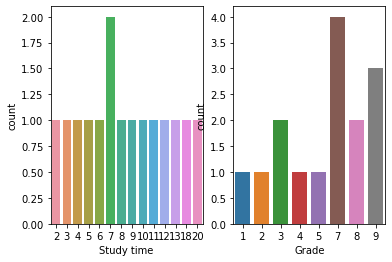

In [36]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

fig, ax =plt.subplots(1,2)
sns.countplot(time_grades['Study time'], ax=ax[0])
sns.countplot(time_grades['Grade'], ax=ax[1])
fig.show()

#### Is there a correlation between `Study time` and `Grade`? Use both Pearson and Spearman correlations and comment your results.

In [37]:
time_grades.corr(method='pearson')

,Study time,Grade
Study time,1.000000,0.798046
Grade,0.798046,1.000000


In [38]:
time_grades.corr(method='spearman')

,Study time,Grade
Study time,1.000000,0.819659
Grade,0.819659,1.000000


In [39]:
"""
With both methods, Pearson and Spearman, the Study time and Grade are correlated. Spearman method shows slightly higher correlation
"""

'\nWith both methods, Pearson and Spearman, the Study time and Grade are correlated. Spearman method shows slightly higher correlation\n'

#### Use matplotlib to visually plot `Study time` vs `Grade`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

<AxesSubplot:>

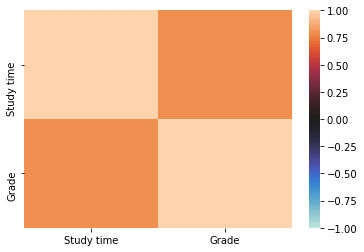

In [40]:
# your code here
sns.heatmap(time_grades.corr(),vmin=-1, vmax=1, center= 0)
#paolo: how about a line plot instead?

In [41]:
"""
the variables have a strong positive correlation. The more time is spent studying the higher the grade
"""

'\nthe variables have a strong positive correlation. The more time is spent studying the higher the grade\n'

#### Could you explain the difference between Pearson and Spearman correlations?

In [42]:
"""
As per Goodle information, Pearson is more appropriate for measurements taken from an interval scale, while Spearman is more appropriate for measurements taken from ordinal scales.
"""

'\nAs per Goodle information, Pearson is more appropriate for measurements taken from an interval scale, while Spearman is more appropriate for measurements taken from ordinal scales.\n'

In [43]:
#paolo check ok